In [1]:
!pip install pandas numpy scikit-learn seaborn matplotlib pillow requests spotipy

  Using cached pandas-2.3.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached numpy-2.3.4-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached scikit_learn-1.7.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.7-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached pillow-12.0.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (8.8 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached spotipy-2.25.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.16.3-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.3-cp311-cp311-macosx_11_

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from PIL import Image
import requests
from io import BytesIO
import random
import webbrowser
import urllib.parse
import spotipy
from spotipy.oauth2 import SpotifyOAuth

In [3]:
df = pd.read_csv("spotify_weather_data.csv")
print("Dataset loaded successfully!\n")

Dataset loaded successfully!



In [4]:
print("Dataset Preview:")
print(df.head(), "\n")

Dataset Preview:
  Weather          Track Name     Artist                              Album  \
0     Fog                Cold  Novo Amor                       Woodgate, NY   
1     Fog         Ylang Ylang        FKJ                     Ylang Ylang EP   
2     Fog   I Wanted to Leave       SYML  I Wanted to Leave (Sitar Version)   
3     Fog  Repeat Until Death  Novo Amor                         Birthplace   
4     Fog              Euphor  Novo Amor                            Heiress   

                                               Image  Popularity  
0  https://i.scdn.co/image/ab67616d0000b273ebce80...           0  
1  https://i.scdn.co/image/ab67616d0000b273e29bde...           3  
2  https://i.scdn.co/image/ab67616d0000b27359b4f5...          67  
3  https://i.scdn.co/image/ab67616d0000b273bb7f48...          70  
4  https://i.scdn.co/image/ab67616d0000b273d309a3...          68   



In [5]:
print("Dataset Info:")
print(df.info(), "\n")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Weather     6368 non-null   object
 1   Track Name  6368 non-null   object
 2   Artist      6368 non-null   object
 3   Album       6368 non-null   object
 4   Image       6367 non-null   object
 5   Popularity  6368 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 298.6+ KB
None 



In [6]:
print("Missing Values:")
print(df.isnull().sum(), "\n")

Missing Values:
Weather       0
Track Name    0
Artist        0
Album         0
Image         1
Popularity    0
dtype: int64 



In [7]:
X = df[["Weather", "Popularity"]]
y = df[["Track Name", "Artist"]]

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ("weather", OneHotEncoder(handle_unknown="ignore"), ["Weather"]),
        ("popularity", StandardScaler(), ["Popularity"])
    ]
)

In [9]:
knn_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", NearestNeighbors(n_neighbors=10, metric="euclidean"))
])

In [10]:
knn_pipeline.fit(X)
print("Model trained successfully!\n")

Model trained successfully!



In [11]:
X_transformed = knn_pipeline.named_steps["preprocessor"].transform(X)
dist_matrix = pairwise_distances(X_transformed)

In [12]:
avg_distance = np.mean(dist_matrix)
min_distance = np.min(dist_matrix)
max_distance = np.max(dist_matrix)

In [13]:
print(f"Average Distance: {avg_distance:.3f}")
print(f"Min Distance: {min_distance:.3f}")
print(f"Max Distance: {max_distance:.3f}\n")

Average Distance: 1.789
Min Distance: 0.000
Max Distance: 4.245



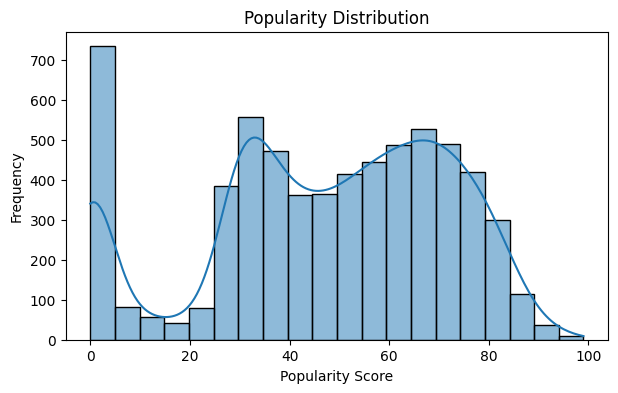

In [14]:
plt.figure(figsize=(7,4))
sns.histplot(df["Popularity"], bins=20, kde=True)
plt.title("Popularity Distribution")
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.show()

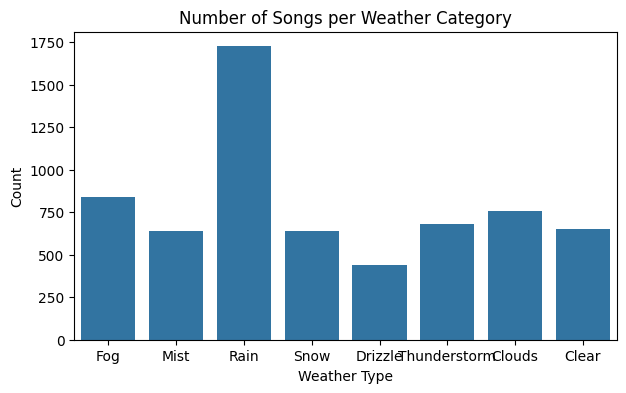

In [15]:
plt.figure(figsize=(7,4))
sns.countplot(x="Weather", data=df)
plt.title("Number of Songs per Weather Category")
plt.xlabel("Weather Type")
plt.ylabel("Count")
plt.show()

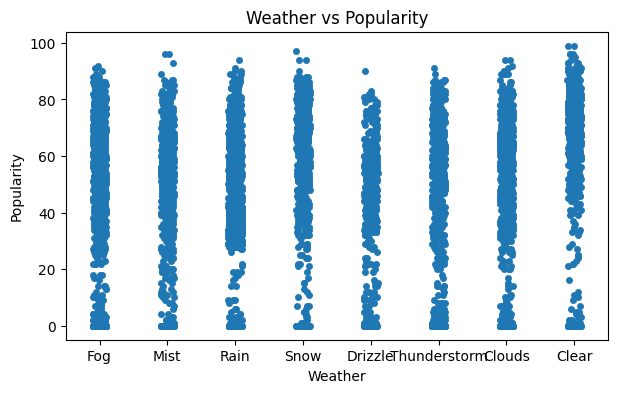

In [16]:
plt.figure(figsize=(7,4))
sns.stripplot(x="Weather", y="Popularity", data=df, jitter=True)
plt.title("Weather vs Popularity")
plt.xlabel("Weather")
plt.ylabel("Popularity")
plt.show()

In [17]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id="e589066a795c4e59b1f6cd5596fe2a17",
    client_secret="525f39dd24ad4bfeaef7656b7a2d4008",
    redirect_uri="http://127.0.0.1:8889/callback",
    scope="user-modify-playback-state,user-read-playback-state,user-read-currently-playing"
))


--- KNN Model Evaluation (Weather Prediction as Proxy) ---
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1 Score : 1.0000


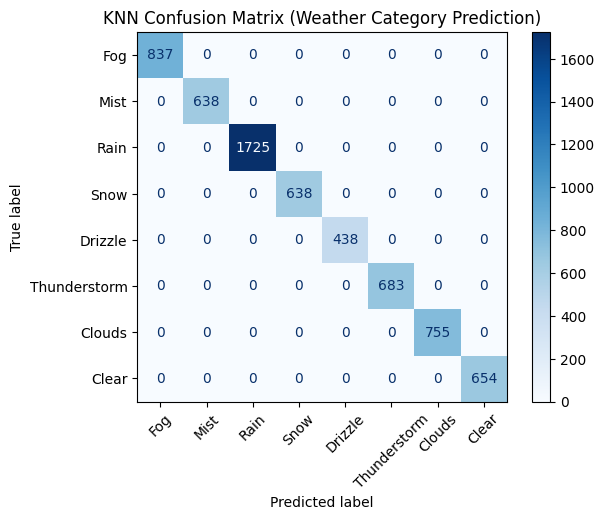

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# --- Step 1: Prepare the transformed features and labels ---
X = df[["Weather", "Popularity"]]
y = df["Weather"]

preprocessor = knn_pipeline.named_steps["preprocessor"]
model = knn_pipeline.named_steps["model"]

# Convert sparse matrix to dense array
X_transformed = preprocessor.transform(X)
if hasattr(X_transformed, "toarray"):
    X_transformed = X_transformed.toarray()

# --- Step 2: Predict the weather type based on nearest neighbors majority ---
predicted_labels = []

for i in range(X_transformed.shape[0]):
    distances, indices = model.kneighbors(X_transformed[i].reshape(1, -1))
    neighbor_labels = y.iloc[indices[0]].values
    predicted_label = max(set(neighbor_labels), key=list(neighbor_labels).count)
    predicted_labels.append(predicted_label)

# --- Step 3: Calculate classification metrics ---
accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y, predicted_labels, average='weighted', zero_division=0)
f1 = f1_score(y, predicted_labels, average='weighted', zero_division=0)

print("\n--- KNN Model Evaluation (Weather Prediction as Proxy) ---")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

# --- Step 4: Confusion Matrix Visualization ---
cm = confusion_matrix(y, predicted_labels, labels=df["Weather"].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df["Weather"].unique())
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("KNN Confusion Matrix (Weather Category Prediction)")
plt.show()


/var/folders/rz/6djxpm_x1474hrmfl6scdss80000gn/T/ipykernel_74252/870123026.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Predicted")


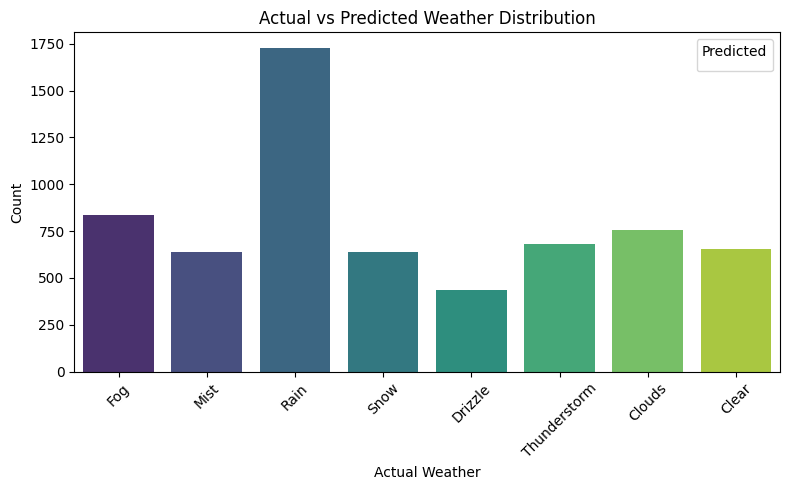

In [19]:

# --- Step 6: Actual vs Predicted Weather Visualization ---
comparison_df = pd.DataFrame({
    "Actual Weather": y,
    "Predicted Weather": predicted_labels
})

plt.figure(figsize=(8,5))
sns.countplot(data=comparison_df, x="Actual Weather", hue="Predicted Weather", palette="viridis")
plt.title("Actual vs Predicted Weather Distribution")
plt.xlabel("Actual Weather")
plt.ylabel("Count")
plt.legend(title="Predicted")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
def ml_recommend_song(weather_input, popularity_score, df, pipeline, sp):
    print(f"\nGenerating recommendation for Weather='{weather_input}' and Popularity={popularity_score}...")

    input_df = pd.DataFrame({
        "Weather": [weather_input],
        "Popularity": [popularity_score]
    })

    preprocessor = pipeline.named_steps["preprocessor"]
    model = pipeline.named_steps["model"]

    transformed_input = preprocessor.transform(input_df)
    distances, indices = model.kneighbors(transformed_input)
    random_index = random.choice(indices[0])

    rec = df.iloc[random_index]

    print("\n--- Recommended Song ---")
    print(f"Track Name : {rec['Track Name']}")
    print(f"Artist      : {rec['Artist']}")
    print(f"Weather     : {rec['Weather']}")
    print(f"Popularity  : {rec['Popularity']}")

    # Display album cover if available
    image_col = None
    for col in df.columns:
        if df[col].astype(str).str.startswith("http").any():
            image_col = col
            break

    if image_col and pd.notna(rec[image_col]):
        try:
            img_url = rec[image_col]
            print(f"\nDisplaying album cover from column '{image_col}': {img_url}")
            response = requests.get(img_url)
            img = Image.open(BytesIO(response.content))
            plt.imshow(img)
            plt.axis("off")
            plt.title(f"{rec['Track Name']} by {rec['Artist']}")
            plt.show()
        except Exception:
            print("(Album cover could not be displayed.)")

    # --- Spotify autoplay ---
    query = f"{rec['Track Name']} {rec['Artist']}"
    results = sp.search(q=query, type='track', limit=1)

    if results['tracks']['items']:
        track_uri = results['tracks']['items'][0]['uri']
        print(f"\nPlaying on Spotify: {rec['Track Name']} by {rec['Artist']}")
        sp.start_playback(uris=[track_uri])
    else:
        print("\nTrack not found on Spotify. Opening search page instead.")
        search_url = f"https://open.spotify.com/search/{urllib.parse.quote(query)}"
        webbrowser.open(search_url)

    print("------------------------")

In [21]:
!pip install pyserial


  Using cached pyserial-3.5-py2.py3-none-any.whl.metadata (1.6 kB)
Using cached pyserial-3.5-py2.py3-none-any.whl (90 kB)

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [22]:
# --- Fixed Cell 30.5: Get live weather data + weather type from ESP32 ---
import serial
import time
import re

def get_weather_from_esp32(port="/dev/cu.usbserial-0001", baud=115200, timeout=10):
    weather_keywords = ["Fog", "Mist", "Rain", "Snow", "Drizzle", "Thunderstorm", "Clouds", "Clear"]
    ser = serial.Serial(port, baudrate=baud, timeout=1)
    print(f"Listening to ESP32 on {port}...\n")

    start_time = time.time()
    detected_weather = None
    full_line = None
    sensor_data = {
        "Temperature": None,
        "Humidity": None,
        "Pressure": None,
        "Altitude": None,
        "Rain Intensity": None,
        "Gas Level": None,
        "UV Level": None
    }

    while time.time() - start_time < timeout:
        line = ser.readline().decode('utf-8', errors='ignore').strip()
        if not line:
            continue

        # Ignore lines that are just ": 1325 Clouds" or partials
        if not line.startswith("Temperature:"):
            continue

        print("ESP32:", line)  # clean output from ESP32
        full_line = line

        # Extract numbers for each parameter
        try:
            sensor_data["Temperature"] = float(re.search(r"Temperature:\s*([-+]?\d*\.\d+|\d+)", line).group(1))
            sensor_data["Humidity"] = float(re.search(r"Humidity:\s*([-+]?\d*\.\d+|\d+)", line).group(1))
            sensor_data["Pressure"] = float(re.search(r"Pressure:\s*([-+]?\d*\.\d+|\d+)", line).group(1))
            sensor_data["Altitude"] = float(re.search(r"Altitude:\s*([-+]?\d*\.\d+|\d+)", line).group(1))
            sensor_data["Rain Intensity"] = float(re.search(r"Rain Intensity:\s*([-+]?\d*\.\d+|\d+)", line).group(1))
            sensor_data["Gas Level"] = int(re.search(r"Gas Level:\s*(\d+)", line).group(1))
            sensor_data["UV Level"] = int(re.search(r"UV Level:\s*(\d+)", line).group(1))
        except:
            pass

        # Detect weather type (end of line)
        for w in weather_keywords:
            if re.search(rf"\b{w}\b", line, re.IGNORECASE):
                detected_weather = w
                break

        if detected_weather:
            break

    ser.close()

    if full_line:
        print("\n--- ESP32 Sensor Readings ---")
        print(full_line)  # show the complete clean line once
        print("-----------------------------\n")

    return detected_weather



Now let's get your recommendation!
Available weather types: Fog, Mist, Rain, Snow, Drizzle, Thunderstorm, Clouds, Clear
Listening to ESP32 on /dev/cu.usbserial-0001...

ESP32: Temperature: 29.10 °C Humidity: 59.00 % Pressure: 924.98 hPa Altitude: 761.83 m Rain Intensity: 0.00 % Gas Level: 3779 UV Level: 1328 Clear

--- ESP32 Sensor Readings ---
Temperature: 29.10 °C Humidity: 59.00 % Pressure: 924.98 hPa Altitude: 761.83 m Rain Intensity: 0.00 % Gas Level: 3779 UV Level: 1328 Clear
-----------------------------


Generating recommendation for Weather='Rain' and Popularity=80...

--- Recommended Song ---
Track Name : Change (In the House of Flies)
Artist      : Deftones
Weather     : Rain
Popularity  : 80

Displaying album cover from column 'Image': https://i.scdn.co/image/ab67616d0000b2735c53799f473fa3e1a48c00ed


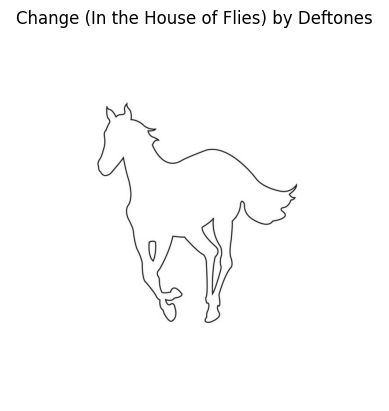

HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'Change (In the House of Flies) Deftones', 'limit': 1, 'offset': 0, 'type': 'track', 'market': None} returned 403 due to Check settings on developer.spotify.com/dashboard, the user may not be registered.


SpotifyException: http status: 403, code: -1 - https://api.spotify.com/v1/search?q=Change+%28In+the+House+of+Flies%29+Deftones&limit=1&offset=0&type=track:
 Check settings on developer.spotify.com/dashboard, the user may not be registered., reason: None

In [25]:
print("\nNow let's get your recommendation!")
available_weathers = df['Weather'].unique()
print(f"Available weather types: {', '.join(available_weathers)}")

weather_input = get_weather_from_esp32()
popularity_score = 80

ml_recommend_song(weather_input, popularity_score, df, knn_pipeline, sp)

print("\nRecommendation complete! Song should be playing on Spotify.")
